Exploratory Data Analysis

Step 1 Import and unserdtand the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

df = pd.read_csv('Data//automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [6]:
# check the data type and quick-check of missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
# identify 'num-of-doors' and 'num-of-cylinders' are object and they should be number. 

Step 2 Data cleaning

In [10]:
df['num-of-doors'].value_counts()

num-of-doors
four    115
two      86
Name: count, dtype: int64

In [13]:
df['num-of-doors-c'] = df['num-of-doors'].replace({'four': 4, 'two': 2})

In [14]:
df['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [15]:
df['num-of-cylinders-c'] = df['num-of-cylinders'].replace({'four': 4, 'two': 2, 'six': 6, 'five': 5, 'eight': 8, 'three': 3, 'twelve': 12})
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas,num-of-doors-c,num-of-cylinders-c
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,13495.0,11.190476,Medium,0,1,2,4
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,27,16500.0,11.190476,Medium,0,1,2,4
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,26,16500.0,12.368421,Medium,0,1,2,6
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,30,13950.0,9.791667,Medium,0,1,4,4
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,22,17450.0,13.055556,Medium,0,1,4,5


In [16]:
# After data cleaning, to save the variables to a list (for later use)

columns = list(df.columns)
columns

['symboling',
 'normalized-losses',
 'make',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price',
 'city-L/100km',
 'horsepower-binned',
 'diesel',
 'gas',
 'num-of-doors-c',
 'num-of-cylinders-c']

In [ ]:
# I personally do not like to replace the original values, but like to create a new column for the cleaned data

Step 3 Exploratory Analysis

[Numerical Variables] Find the correlation between the numeric columns


In [17]:
# Put the dependent variable the last so as to examine the correlationship more easily

corr = df[['symboling',
           'normalized-losses',
           'wheel-base',
           'length',
           'width',
           'height',
           'curb-weight',
           'engine-size',
           'bore',
           'stroke',
           'compression-ratio',
           'horsepower',
           'peak-rpm',
           'city-mpg',
           'highway-mpg',
           'city-L/100km',
           'diesel',
           'gas',
           'num-of-doors-c',
           'num-of-cylinders-c',
           'price'
          ]].corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,diesel,gas,num-of-doors-c,num-of-cylinders-c,price
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,...,0.075819,0.279740,-0.035527,0.036233,0.066171,-0.196735,0.196735,-0.672344,-0.118016,-0.082391
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,...,0.217299,0.239543,-0.225016,-0.181877,0.238567,-0.101546,0.101546,-0.361368,0.111362,0.133999
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,...,0.371147,-0.360305,-0.470606,-0.543304,0.476153,0.307237,-0.307237,0.445245,0.348931,0.584642
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,...,0.579821,-0.285970,-0.665192,-0.698142,0.657373,0.211187,-0.211187,0.395122,0.440348,0.690628
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,...,0.615077,-0.245800,-0.633531,-0.680635,0.673363,0.244356,-0.244356,0.227655,0.520118,0.751265
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,...,-0.087027,-0.309974,-0.049800,-0.104812,0.003811,0.281578,-0.281578,0.538383,0.007776,0.135486
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,...,0.757976,-0.279361,-0.749543,-0.794889,0.785353,0.221046,-0.221046,0.208517,0.604454,0.834415
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,...,0.822676,-0.256733,-0.650546,-0.679571,0.745059,0.070779,-0.070779,0.024094,0.847639,0.872335
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566936,-0.267392,-0.582027,-0.591309,0.554610,0.054458,-0.054458,0.119222,0.202661,0.543155
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,...,0.098462,-0.065713,-0.034696,-0.035201,0.037300,0.241303,-0.241303,-0.007887,0.013876,0.082310


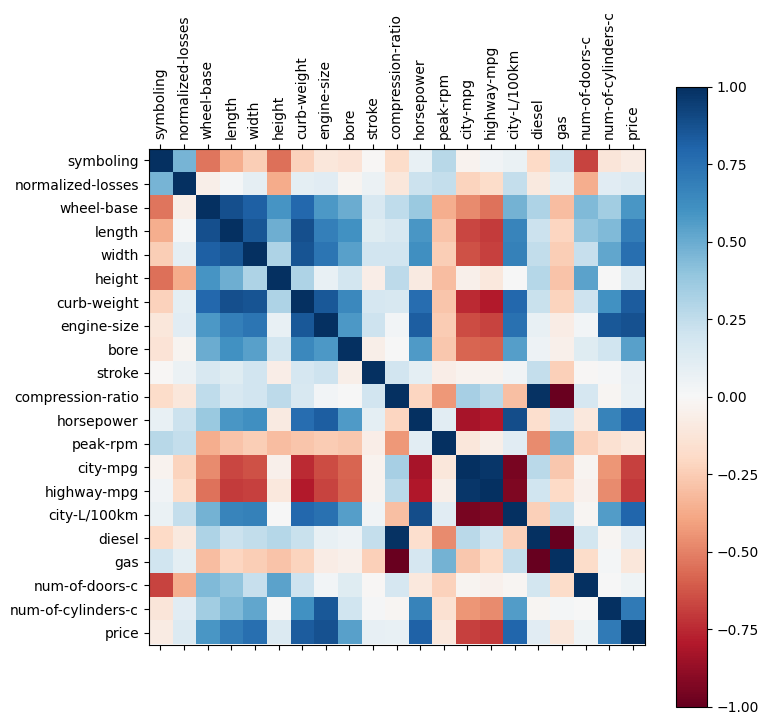

In [44]:
# Create a heatmap to visualize the correlation and identify potential multicollinearity

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns) 
plt.colorbar()
plt.show()

In [ ]:
# Potential multicollinearity:
# - disel vs. compression-ratio
# - city-L/100km vs. horsepower
# - a bunch in blue on the top left

# no p-value given. So we need scipy package to get the P value (see later)
# in practice we should eliminate the variable causing multicollinearity ONE BY ONE, before go deeper into correlation.

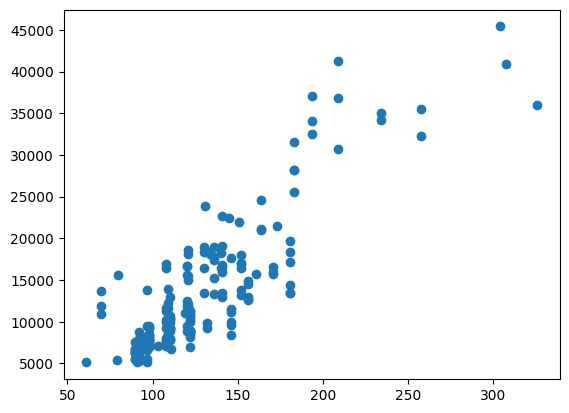

In [20]:
# find the scatterplot of "engine-size" and "price".

plt.scatter(df['engine-size'], df['price'])

In [ ]:
# Plus from the correlation table, the corr between engine-size and price is 0.87.

<Axes: xlabel='highway-mpg', ylabel='price'>

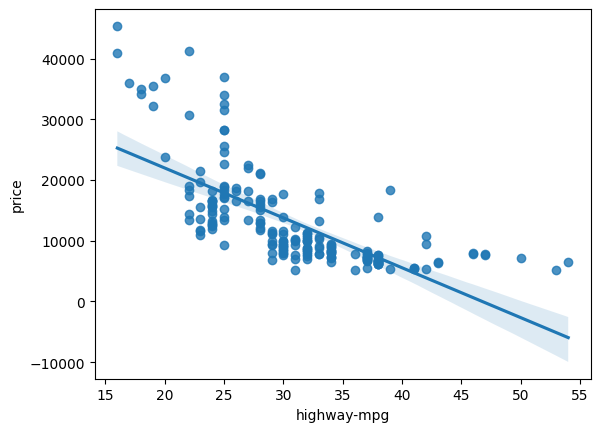

In [21]:
# find the scatterplot of "highway-mpg" and "price"

sns.regplot(data = df, x = 'highway-mpg', y = 'price')

In [ ]:
# from the correlation table above, the corr = -0.70

[Categorical Variables] 

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

<Axes: xlabel='body-style', ylabel='price'>

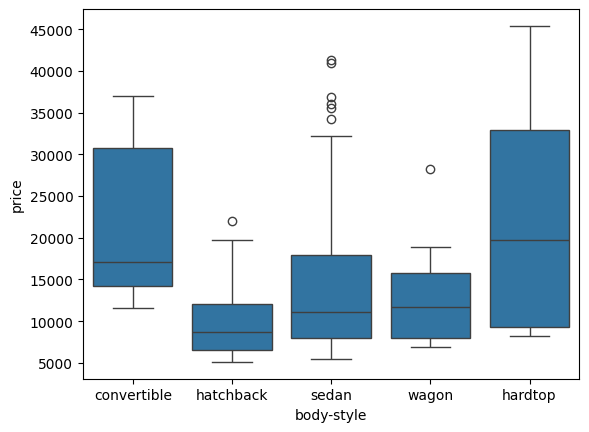

In [23]:
# look at the relationship between "body-style" and "price"

sns.boxplot(data = df, x = 'body-style', y = 'price')

[Basic of Grouping]

In [32]:
# To examine the average price of different categories in 'drive-wheels'

# examine the unique value of a categorical variable

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [37]:
df_grpone = df[['drive-wheels', 'price']]
df_grp = df_grpone.groupby(['drive-wheels'], as_index = False).mean()
df_grp

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [39]:
# For more than one categorical varibale

df_grptwo = df[['drive-wheels', 'body-style', 'price']]
df_grp2 = df_grptwo.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_grp2

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [43]:
# use pivot table to better visualise the groups

df_pivot = df_grp2.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

C:\Users\chris\AppData\Local\Temp\ipykernel_10548\1812743059.py:23: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar(axx)


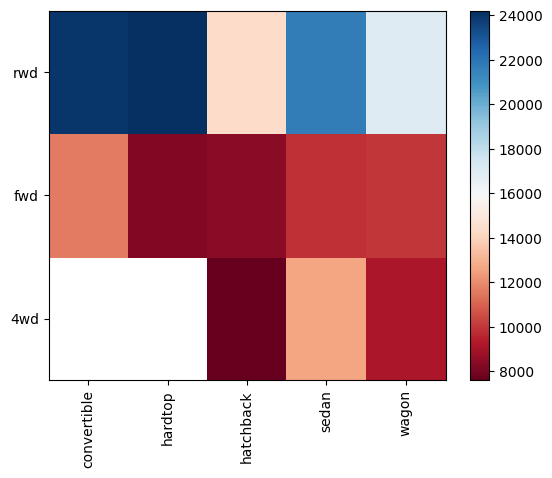

In [58]:
# plot the pivot table using heatmap

fig, ax = plt.subplots() # <=== syntax: getting BOTH 'fig' and 'ax' from plt.subplot()
axx = ax.pcolor(df_pivot, cmap = 'RdBu')
# plots make up the main part of the story and are essential to its structure, 
# whereas subplots generally span smaller parts of the story and add extra elements

# label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotation
plt.xticks(rotation = 90)

plt.colorbar(axx)
plt.show()


[Continue to examine the correlation]

In [57]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.584641822265508  with a P-value of P = 8.076488270732947e-20


In [59]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.369057428259526e-48


In [60]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455182  with a P-value of P = 9.265491622200262e-64


In [61]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844678  with a P-value of P =  2.321132065567512e-29


In [62]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P =  1.7495471144475452e-31
